In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split as sklearn_train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import time
from sklearn.inspection import permutation_importance
import pickle


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def train_randomforest(X_train, y_train):
  classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  classifier.fit(X_train, y_train)
  return classifier
def save_model(model , file_name): 
  pickle.dump(model, open(file_name, 'wb'))
def load_model(file_name):
  loaded_model = pickle.load(open(file_name, 'rb'))
  return loaded_model
def make_prediction(model , to_predict):
  result=model.predict(to_predict)
  return result
def calcul_acc(y_test , y_pred):
  cm = confusion_matrix(y_test, y_pred)
  acc= accuracy_score(y_test, y_pred)
  return acc
def read_excel(path):
  dataset=pd.read_excel(path)
  return dataset
def split(dataset):
  # Splitting the dataset features into X and y
  X = dataset.iloc[:,1 :].values
  y = dataset.iloc[:, 0].values
  return X , y
def split_train_test(X , y , test_size) :
  X_train, X_test, y_train, y_test = sklearn_train_test_split(X, y, test_size = test_size, random_state = 18,shuffle=True)
  return X_train, X_test, y_train, y_test

In [4]:
data_path= '/content/drive/MyDrive/freelance/Houssem/datafinal.xlsx'
file_name="classifier.sav"

In [5]:
dataset=read_excel(data_path)
dataset.head()

,Y,C,V,T,P,BW
0,1,0,20,20,20,20
1,1,0,20,20,20,40
2,1,0,20,20,20,60
3,1,0,20,20,20,80
4,1,0,20,20,20,100


In [6]:
X , y = split(dataset)


In [7]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
X_train, X_test, y_train, y_test= split_train_test(X , y , 0.1) 

In [30]:
classifier = train_randomforest(X_train , y_train)

In [31]:
result = make_prediction(classifier , np.array([[ 0,20,40,40,100]]))

In [32]:
result

array([1])

In [33]:

Y_pred=make_prediction(classifier , X_test)
calcul_acc(y_test , Y_pred)

0.936

In [34]:
save_model(classifier , file_name)

In [35]:
start_time = time.time()
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.004 seconds


In [36]:
# feature_names = [f"feature {i}" for i in range(X.shape[1])]
feature_names= ['C','V', 'T', 'P', 'BW']

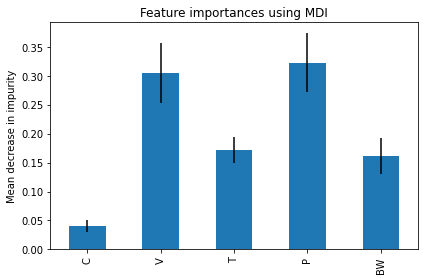

In [37]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [38]:
start_time = time.time()
result = permutation_importance(
    classifier, X, y, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 0.228 seconds


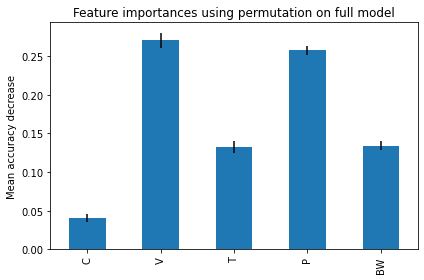

In [39]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()